# Neural networks with numpy

## Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input to train the model on

In [5]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))


inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


## Generate the targets 

In [6]:
noise = np.random.uniform(-1, 1, (observations,1)) #noise because the targets have a small amount of noise

targets = 2*xs - 3*zs + 5 + noise #(arbitrary function )


print (targets.shape)

(1000, 1)


### Plot the training data

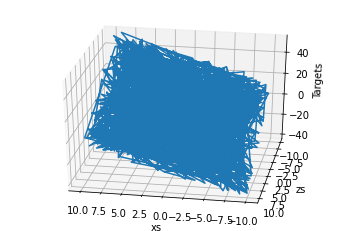

In [7]:
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()
targets = targets.reshape(observations,1)

## Initialize variables

In [8]:
weights = np.random.uniform(low=-0.1, high=0.1, size=(2, 1))


biases = np.random.uniform(low=-0.1, high=0.1, size=1)


print (weights)
print (biases)

[[-0.0955636 ]
 [-0.09148667]]
[-0.09241943]


##Set a learning rate

In [9]:
learning_rate = 0.02

## Train the model

In [10]:
for i in range(100):
  outputs = np.dot(inputs,weights) + biases
  deltas = outputs - targets
  loss = np.sum(deltas **2) / 2 / observations
  print(loss)
  deltas_scaled = deltas/observations
  ## update rule
  weights = weights - learning_rate * np.dot(inputs.T , deltas_scaled)
  biases = biases - learning_rate * np.sum(deltas_scaled)

222.88855790969157
37.13605876367542
14.97031965590849
11.929515250174084
11.169953816076163
10.69935574559056
10.278695334574484
9.878491044348618
9.494582455875163
9.12591411487392
8.771832650968852
8.43175492669379
8.105126357994985
7.791414974576277
7.490109928767704
7.200720585951358
6.92277571594368
6.655822724453838
6.3994269159462345
6.153170785780847
5.916653340363072
5.689489444181557
5.471309192668965
5.261757309864217
5.060492569895396
4.867187241341221
4.681526553566373
4.503208184161625
4.33194176665417
4.1674484176865185
4.009460282894035
3.8577201007416453
3.711980783609485
3.572005015445337
3.4375648653287034
3.3084414163172444
3.184424408971225
3.0653118989754775
2.9509099283013915
2.841032209373453
2.7354998217260253
2.634140920656454
2.536790457400057
2.4432899103713286
2.353487027033777
2.267235575977982
2.1843951088042624
2.104830731422123
2.028412884394146
1.9550171319666043
1.8845239594432641
1.81681857857247
1.7517907406305557
1.6893345568972455
1.6293483262307

### Print weights and biases and see if we have worked correctly.

In [11]:
print (weights, biases)

[[ 2.00354385]
 [-2.99438737]] [4.3020848]


### Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy. <br/>
The closer this plot is to a 45 degree line, the closer target and output values are.

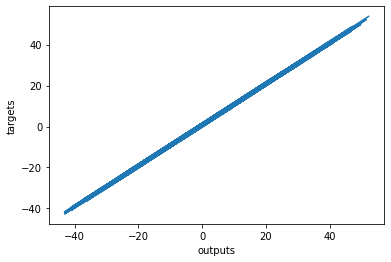

In [12]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()